In [1]:
import sys
import os

notebook_cwd = os.getcwd()
src_path = os.path.join(notebook_cwd, '..')
if src_path not in sys.path:
    sys.path.append(src_path)


# Imports

In [2]:
from dataclasses import asdict

import matplotlib.pyplot as plt

from src.common_utils.custom_vars import InterferometerType
from src.demo.paper.transfer_matrix.utils import visualize_separate, SamplingOptionsSchema, visualize_together
from src.interface.configuration import load_config
from src.outputs.visualization import RcParamsOptions, SubplotsOptions, savefig_dir_list

%matplotlib inline


In [9]:
def load_transfer_matrix_figures(options_schema, figsize=(8, 6), fontsize=13, opd_idx=10):
    options = SamplingOptionsSchema(**options_schema)
    
    experiment = options.create_experiment()
    transmittance = experiment.transmittance()
    reflectivity = experiment.reflectance()
    airy_gain = transmittance ** 2
    transfer_matrix = experiment.transfer_matrix()
    dct_orthogonalize_kwargs = {
        "device_type": experiment.device_type,
        "reflectance": reflectivity,
        "airy_gain": airy_gain,
    }
    alpha = experiment.alpha()

    rc_params = RcParamsOptions(fontsize=fontsize)
    subplots_opts = SubplotsOptions(
        nrows=2,
        ncols=2,
        squeeze=False,
        figsize=figsize,
        tight_layout=True,
    )
    plt.rcParams['font.size'] = str(rc_params.fontsize)
    fig, axs = plt.subplots(**asdict(subplots_opts))
    fig, axs = visualize_together(
        fig=fig,
        axs=axs,
        transfer_matrix=transfer_matrix,
        dct_orthogonalize_kwargs=dct_orthogonalize_kwargs,
        opd_idx=opd_idx,
        is_show=True,
        x_ticks_decimals=1,
        y_ticks_decimals=0,
        markevery=5,
        alpha=alpha,
    )


# Loading Options

In the following, we load the transfer matrix for a:
* Michelson Interferometer
* Fabry-Perot Interferometer

In each case, the "options" schema sets the parameters for the experiment.

It is possible to play with the parameters of the schema composed of:
* Interferometer type
* Reflectivity (scalar)
* Number of OPDs
* OPD step size
* Minimum wavenumber
* maximum wavenumber
* [Optional] Override the harmonic order (replaces the automatic "N"-wave approximation to a chosen value)

## Michelson Interferometer Transfer Matrix

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


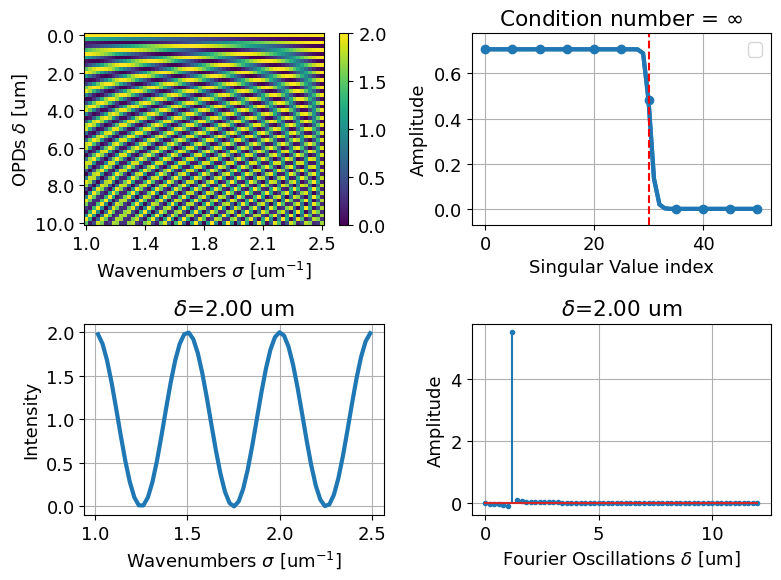

In [10]:

michelson_schema = {
    "experiment_title": "mich",
    "device": {
        "type": InterferometerType.MICHELSON,
        "reflectance_scalar": 0.5,
        "opds": {
            "num": 51,
            "step": 0.2,
        },
    },
    "spectral_range": {
        "min": 1.,
        "max": 2.5,
        "override_harmonic_order": 3,
    },
}
load_transfer_matrix_figures(options_schema=michelson_schema)


## Fabry-Perot Interferometer Transfer Matrix

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


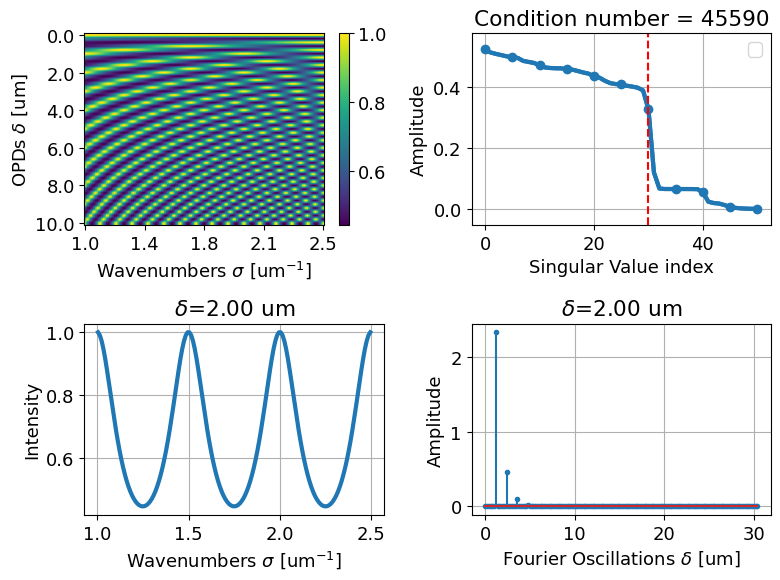

In [11]:
fabry_perot_schema = {
    "experiment_title": "fp",
    "device": {
        "type": InterferometerType.FABRY_PEROT,
        "reflectance_scalar": 0.2,
        "opds": {
            "num": 51,
            "step": 0.2,
        },
    },
    "spectral_range": {
        "min": 1.,
        "max": 2.5,
        "override_harmonic_order": None,
    },
}
load_transfer_matrix_figures(options_schema=fabry_perot_schema)


# Paper figures

In the following, we load the schemas that reproduce Fig. 3 in the paper.

In [12]:
def load_paper_options_list():
    """Loads a list of schemas"""

    options_schema_list = [
        {
            "experiment_title": "mich_oversampled",
            "device": {
                "type": InterferometerType.MICHELSON,
                "reflectance_scalar": 0.5,
                "opds": {
                    "num": 51,
                    "step": 0.2,
                },
            },
            "spectral_range": {
                "min": 1.,
                "max": 2.5,
                "override_harmonic_order": 3,
            },
        },
        {
            "experiment_title": "fp_0_low_r",
            "device": {
                "type": InterferometerType.FABRY_PEROT,
                "reflectance_scalar": 0.2,
                "opds": {
                    "num": 51,
                    "step": 0.2,
                },
            },
            "spectral_range": {
                "min": 1.,
                "max": 2.5,
                "override_harmonic_order": None,
            },
        },
        {
            "experiment_title": "fp_0_med_r",
            "device": {
                "type": InterferometerType.FABRY_PEROT,
                "reflectance_scalar": 0.5,
                "opds": {
                    "num": 51,
                    "step": 0.2,
                },
            },
            "spectral_range": {
                "min": 1.,
                "max": 2.5,
                "override_harmonic_order": None,
            },
        },
        {
            "experiment_title": "fp_0_high_r",
            "device": {
                "type": InterferometerType.FABRY_PEROT,
                "reflectance_scalar": 0.8,
                "opds": {
                    "num": 51,
                    "step": 0.2,
                },
            },
            "spectral_range": {
                "min": 1.,
                "max": 2.5,
                "override_harmonic_order": None,
            },
        },
    ]
    return options_schema_list


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


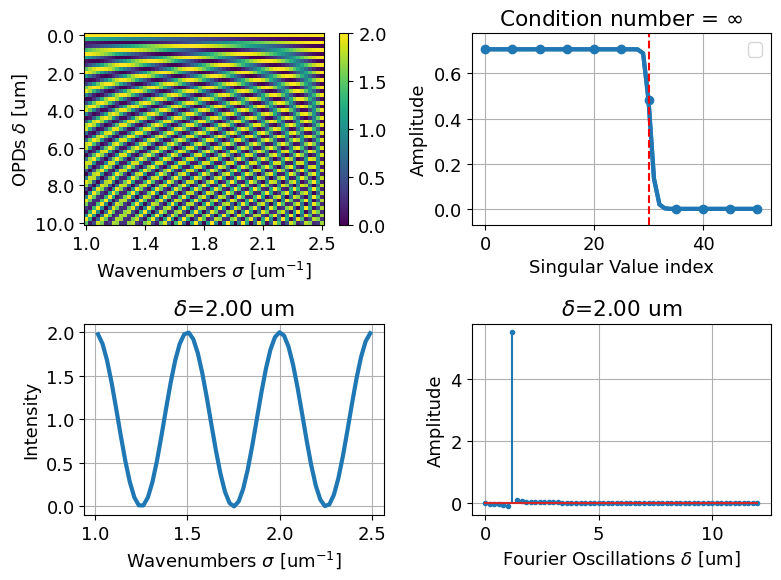

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


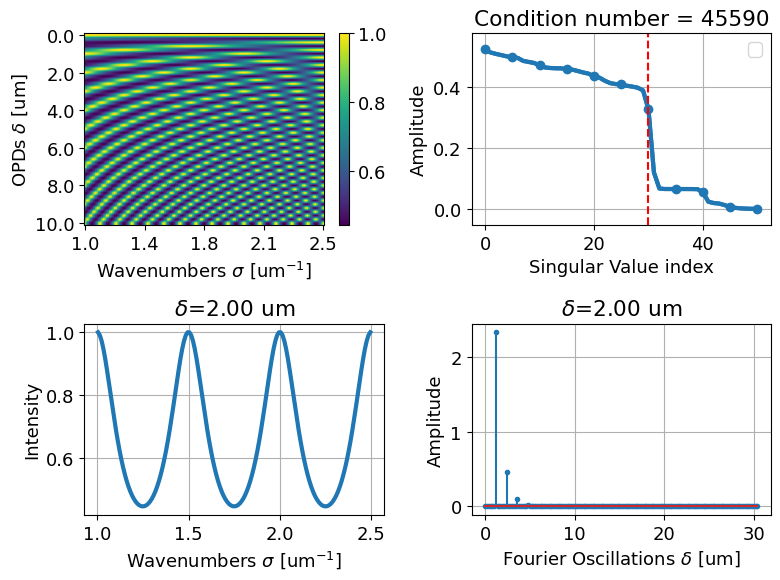

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


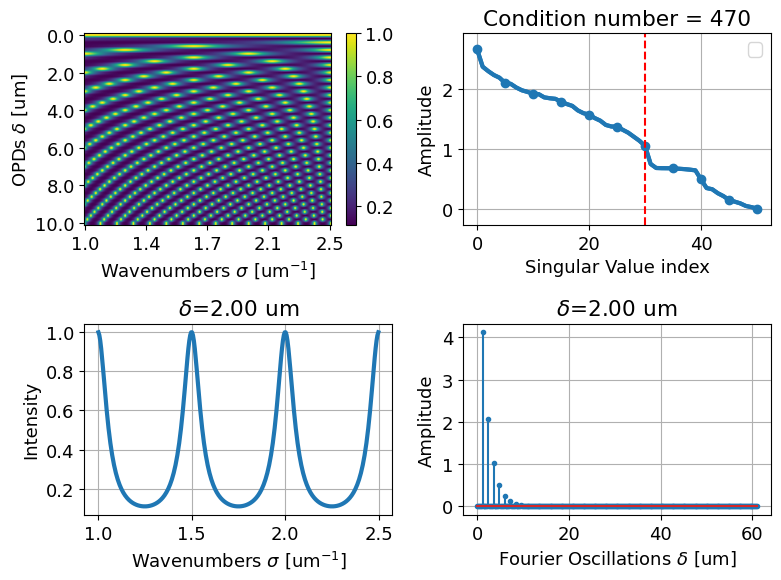

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


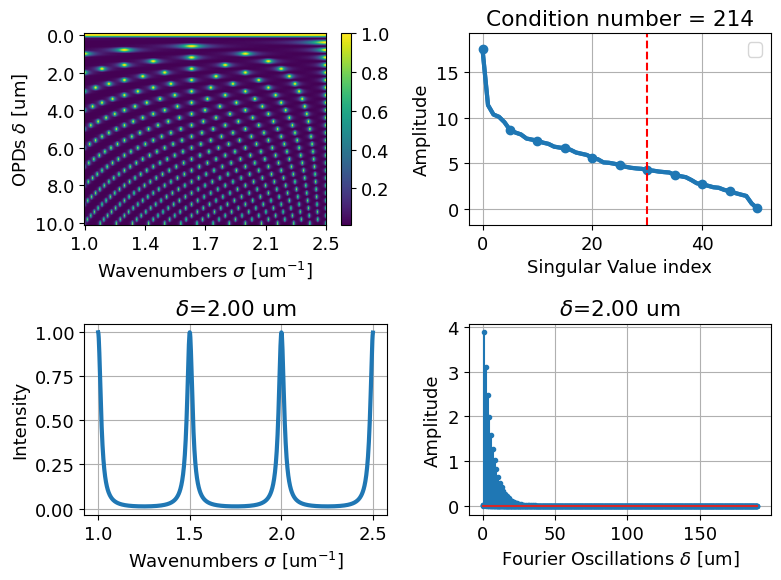

In [13]:
options_schema_list = load_paper_options_list()
for schema in options_schema_list:
    load_transfer_matrix_figures(options_schema=schema)